---

<center> <h1> <span style='color:#292D78'> CREWES Data Science Training </span> </h1> </center>

<center> <h2> <span style='color:#DF7F00'> Lecture 8: Regression 1 </span> </h2> </center>

---

In this [Jupyter Notebook](https://jupyter.org/install) we will see different regression models.

# Regression 1

For this notebook, we will learn how to use three different regression models from [Scikit-Learn](https://scikit-learn.org/stable/index.html): [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression), [LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html?highlight=linearsvr#sklearn.svm.LinearSVR), [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html?highlight=mlpregressor#sklearn.neural_network.MLPRegressor).

For the test, we will use the [Diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) toy dataset from *Scikit-Learn*.

### Diabetes Dataset

* age: age in years
* sex
* bmi: body mass index
* bp: average blood pressure
* s1: tc, total serum cholesterol
* s2: ldl, low-density lipoproteins
* s3: hdl, high-density lipoproteins
* s4: tch, total cholesterol / HDL
* s5: ltg, possibly log of serum triglycerides level
* s6: glu, blood sugar level
* target: quantitative measure of disease progression one year after baseline

Loading packages:

In [1]:
# Core
import numpy as np
import pandas as pd

# Supressing scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# print plots
%matplotlib inline 

# Machine Learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

# Dataset
from sklearn.datasets import load_diabetes

# To supress warnings and deprecated messages
import warnings

warnings.filterwarnings("ignore")

Loading Diabetes data:

In [2]:
diabetes = load_diabetes(as_frame = True)
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
data = diabetes.frame
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.04,0.05,0.06,0.02,-0.04,-0.03,-0.04,-0.00,0.02,-0.02,151.00
1,-0.00,-0.04,-0.05,-0.03,-0.01,-0.02,0.07,-0.04,-0.07,-0.09,75.00
2,0.09,0.05,0.04,-0.01,-0.05,-0.03,-0.03,-0.00,0.00,-0.03,141.00
3,-0.09,-0.04,-0.01,-0.04,0.01,0.02,-0.04,0.03,0.02,-0.01,206.00
4,0.01,-0.04,-0.04,0.02,0.00,0.02,0.01,-0.00,-0.03,-0.05,135.00
...,...,...,...,...,...,...,...,...,...,...,...
437,0.04,0.05,0.02,0.06,-0.01,-0.00,-0.03,-0.00,0.03,0.01,178.00
438,-0.01,0.05,-0.02,-0.07,0.05,0.08,-0.03,0.03,-0.02,0.04,104.00
439,0.04,0.05,-0.02,0.02,-0.04,-0.01,-0.02,-0.01,-0.05,0.02,132.00
440,-0.05,-0.04,0.04,0.00,0.02,0.02,-0.03,0.03,0.04,-0.03,220.00


The data contains $442$ rows and $11$ columns.

Checking data types:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


* There are no missing values in the data. 
* All columns are numeric.

Checking for duplicates:

In [5]:
data.duplicated().sum()

0

There are not duplicated rows.

Checking again for missing:

In [6]:
data.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

There are no missing values.

Statistical description of the data:

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.00,-0.00,0.05,-0.11,-0.04,0.01,0.04,0.11
sex,442.00,0.00,0.05,-0.04,-0.04,-0.04,0.05,0.05
bmi,442.00,-0.00,0.05,-0.09,-0.03,-0.01,0.03,0.17
bp,442.00,0.00,0.05,-0.11,-0.04,-0.01,0.04,0.13
s1,442.00,-0.00,0.05,-0.13,-0.03,-0.00,0.03,0.15
s2,442.00,0.00,0.05,-0.12,-0.03,-0.00,0.03,0.20
s3,442.00,-0.00,0.05,-0.10,-0.04,-0.01,0.03,0.18
s4,442.00,0.00,0.05,-0.08,-0.04,-0.00,0.03,0.19
s5,442.00,-0.00,0.05,-0.13,-0.03,-0.00,0.03,0.13
s6,442.00,-0.00,0.05,-0.14,-0.03,-0.00,0.03,0.14


* All features seem to be z-scaled.
* Target have a large range of values (25 to 346).

# EDA

## Univariate Analysis

### Numeric Features

Let's check the distribution of the numeric columns.

In [8]:
def hist_box(data, feature, figsize=(12, 7)):

    # Subplot canvas
    fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios": (0.25, 0.75)}, figsize = figsize)

    # Boxplot on top
    sns.boxplot(data = data, x = feature, ax = ax_box, showmeans = True, color = "pink")  # boxplot will be created and a star will indicate the mean value of the column
    
    # Histogram on bottom
    sns.histplot(data = data, x = feature, ax = ax_hist) # histogram will be created and

    # Add mean and median to histogram
    ax_hist.axvline(data[feature].mean(), color = "green") # mean
    ax_hist.axvline(data[feature].median(), color = "orange") # median

    # Title
    fig.suptitle("Distribution of " + feature, fontsize=16)

In [9]:
# Get columns names:
cols = list(data)

print(cols)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


Now let's plot columns using a for loop:

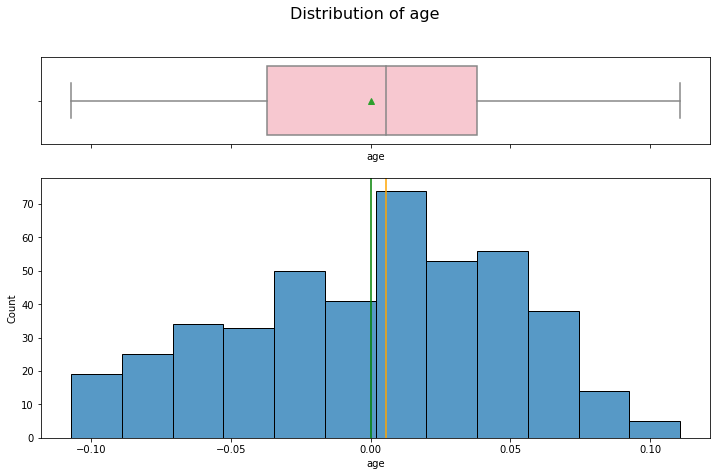

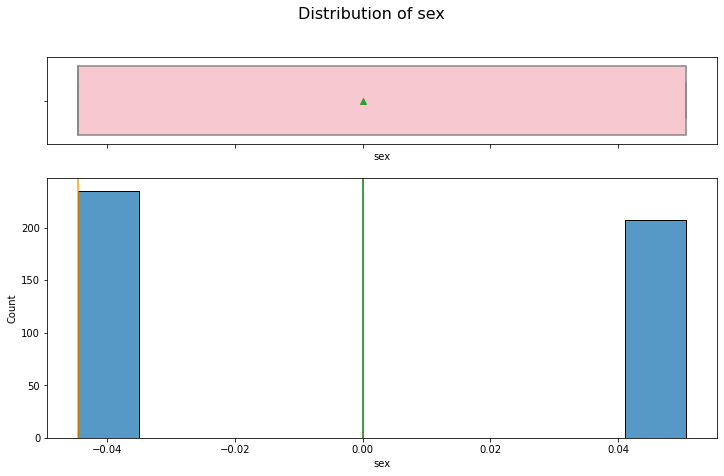

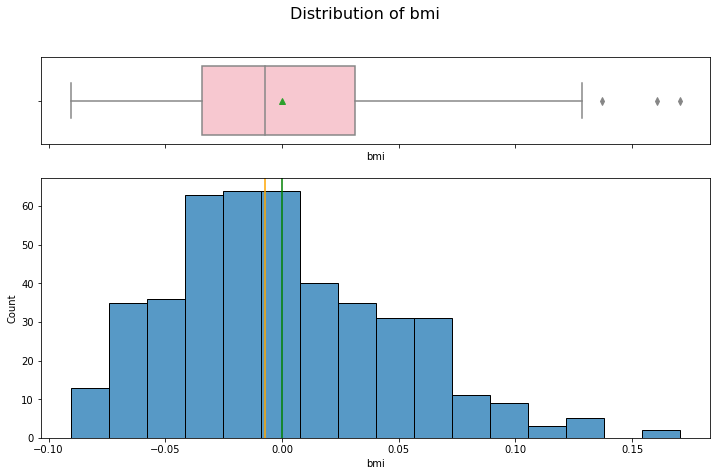

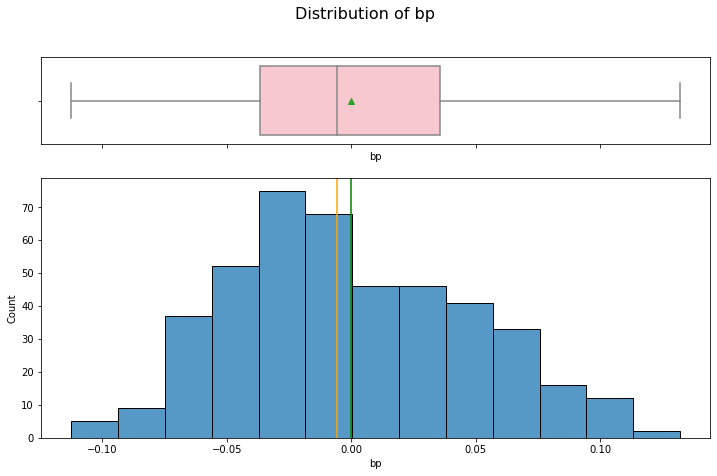

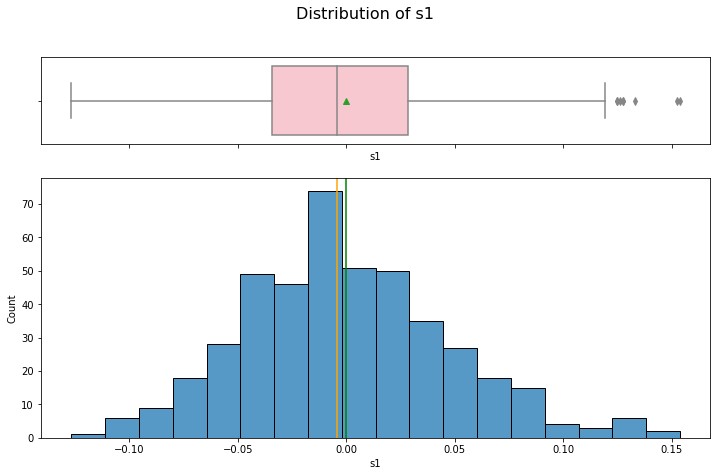

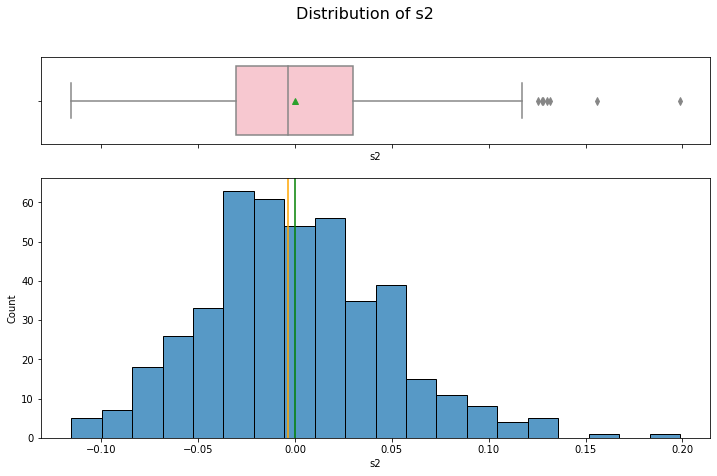

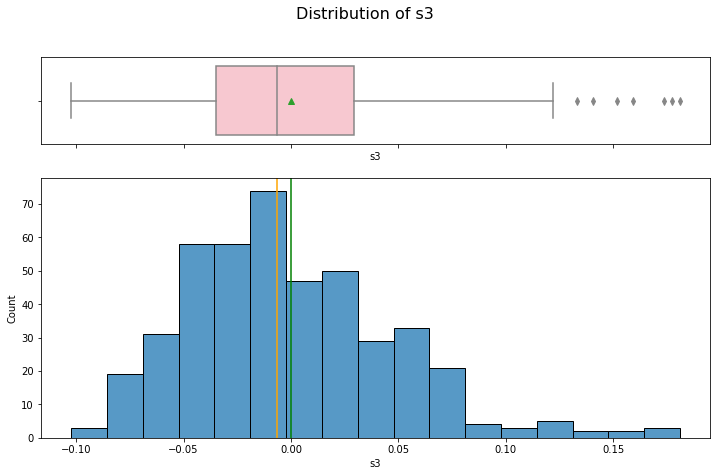

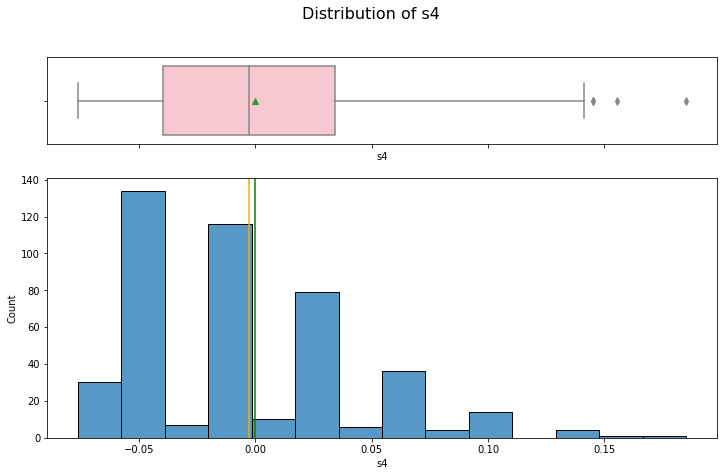

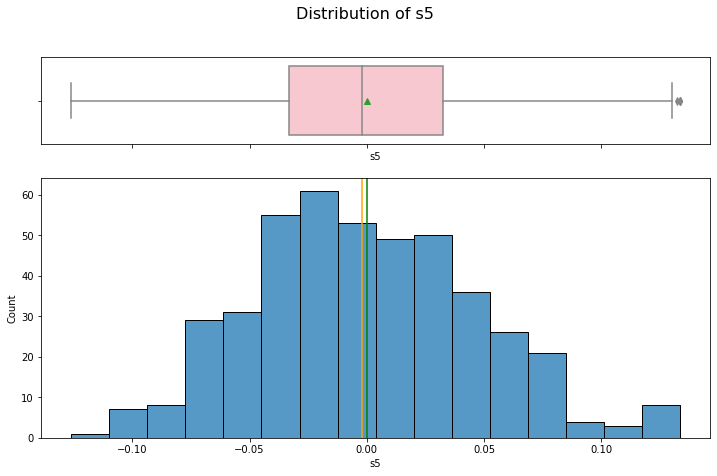

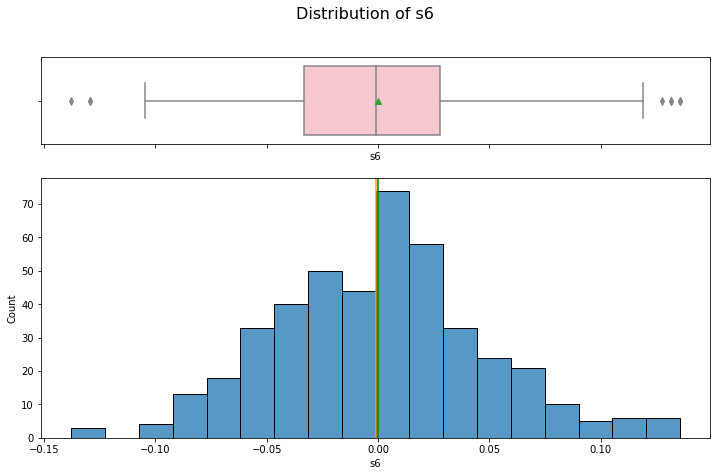

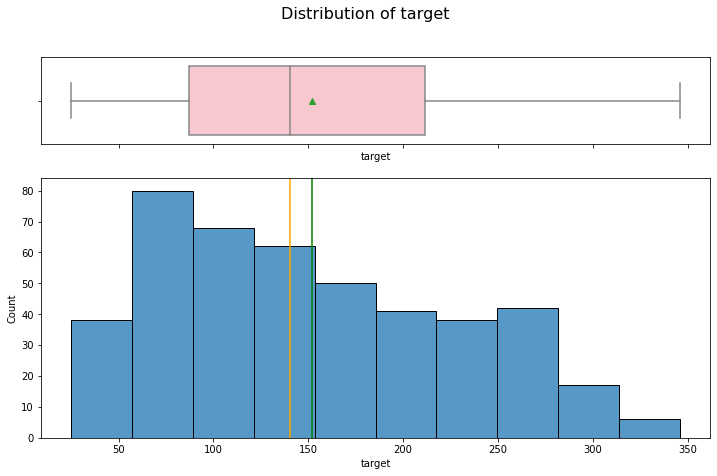

In [10]:
for i in cols:
    hist_box(data, i)

* Most features have a distribution close to normal
* The target has a slightly right skewed distribution

## Bivariate Analysis

### Cols vs Sex

In [11]:
cols_num = cols.copy()
cols_num.remove("sex")
cols_num

['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

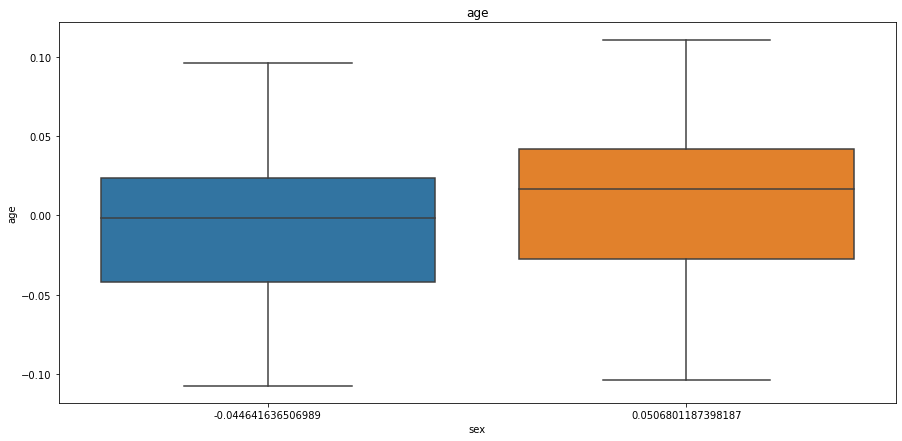

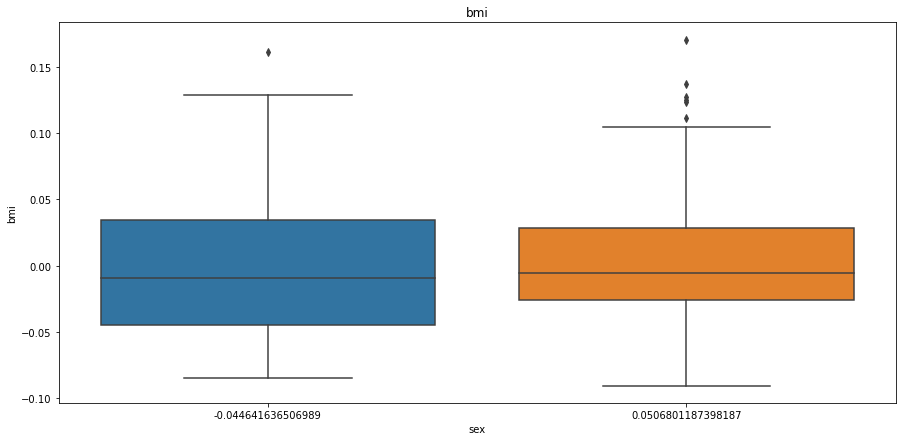

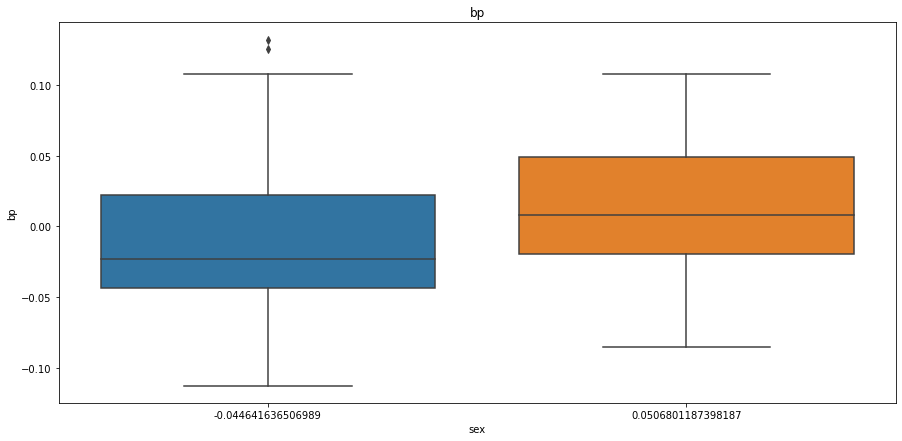

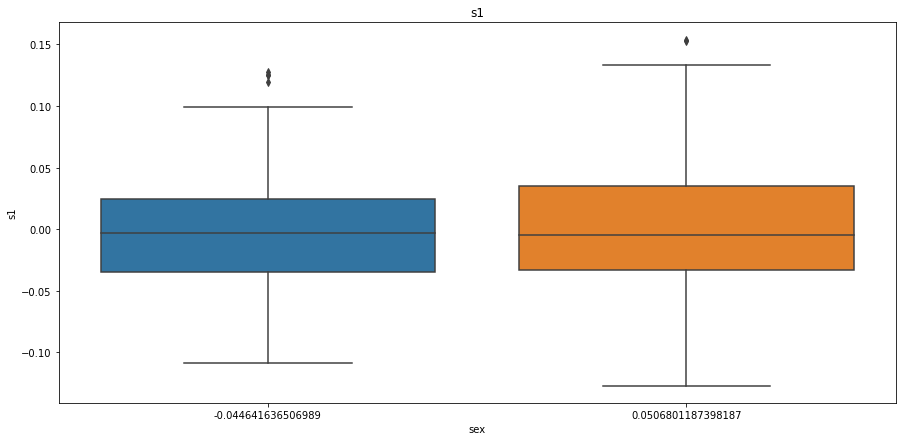

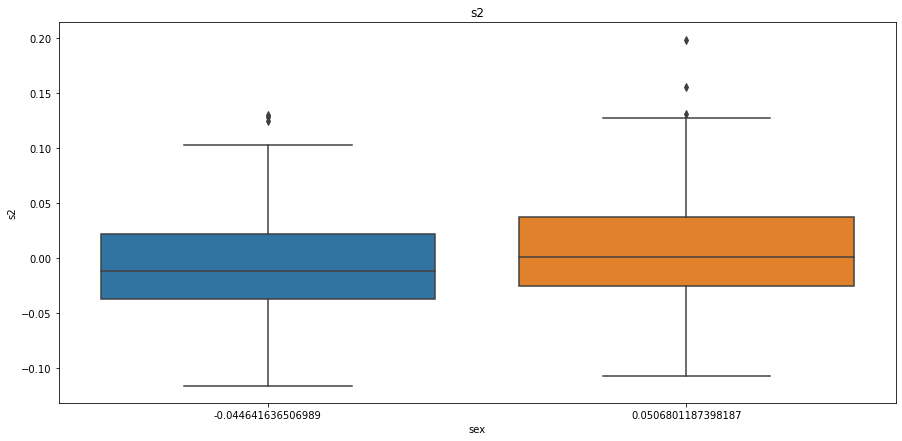

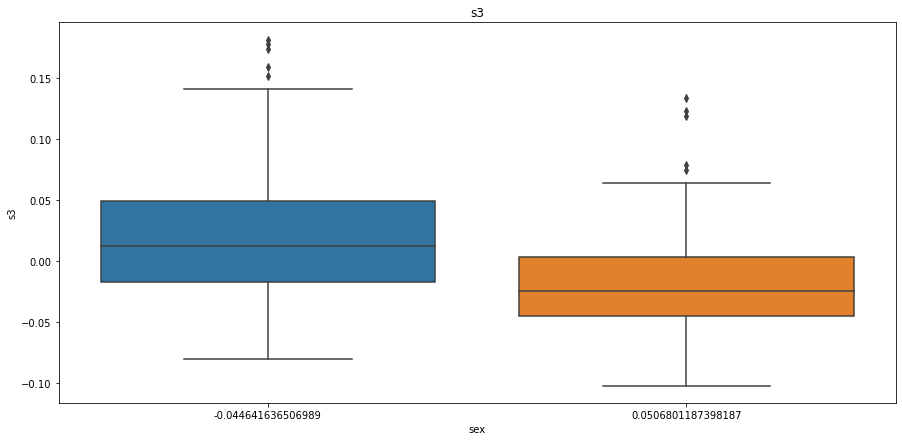

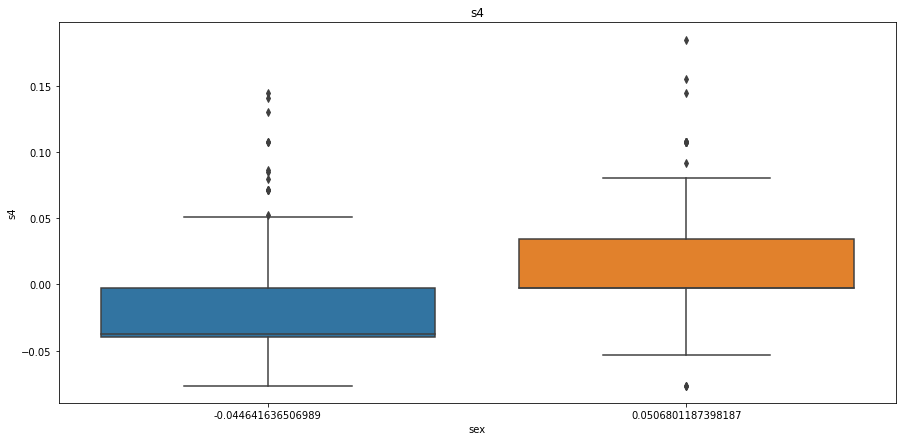

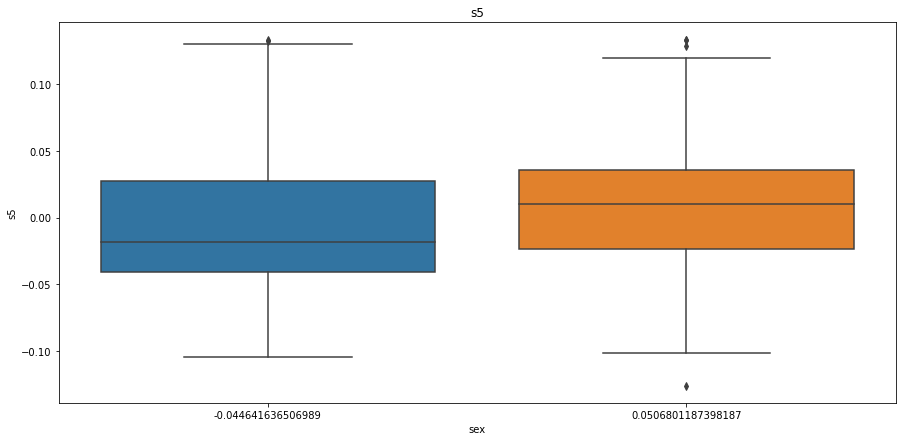

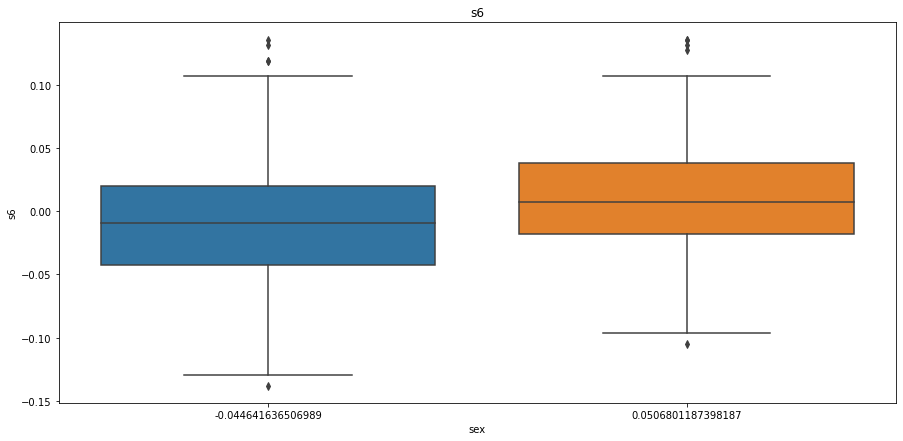

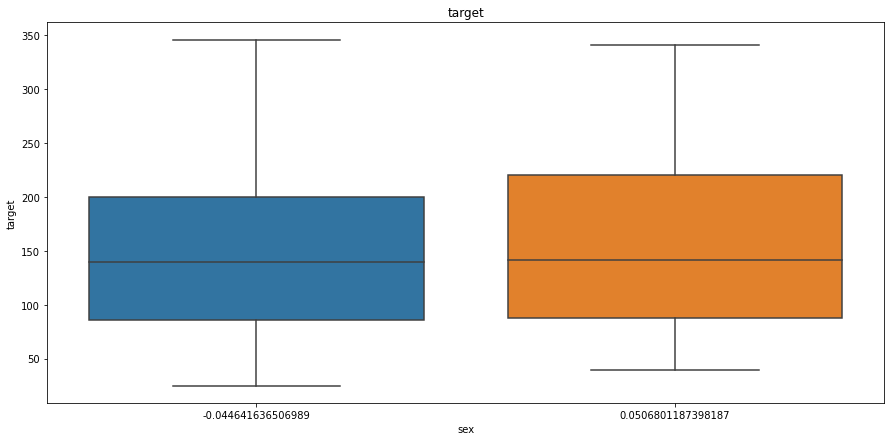

In [12]:
for i in cols_num:
    plt.figure(figsize = (15, 7))
    sns.boxplot(data = data, x = "sex", y = i)
    plt.title(i)
    plt.show()

* There is no visible difference between genders for the target.
* Patitents of gender 0.05 tend to be older, have higher blood pressure (bp), higher low-density lipoproteins (s2), lower high-density lipoproteins (s3), higher cholesterol (s4), higher serum triglycerides level (s5), and higher blood sugar level (s6).

## Multivariate

### Correlation Plot

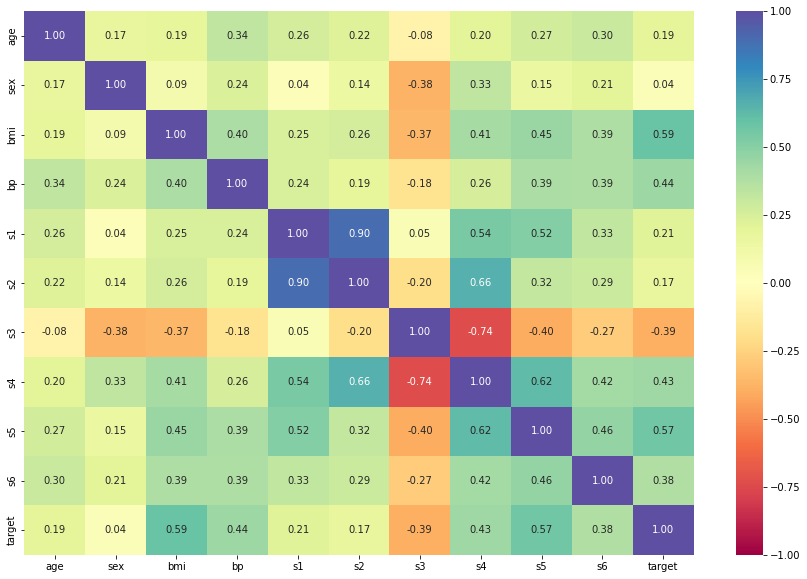

In [13]:
plt.figure(figsize = (15,10))
sns.heatmap(data = data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral");

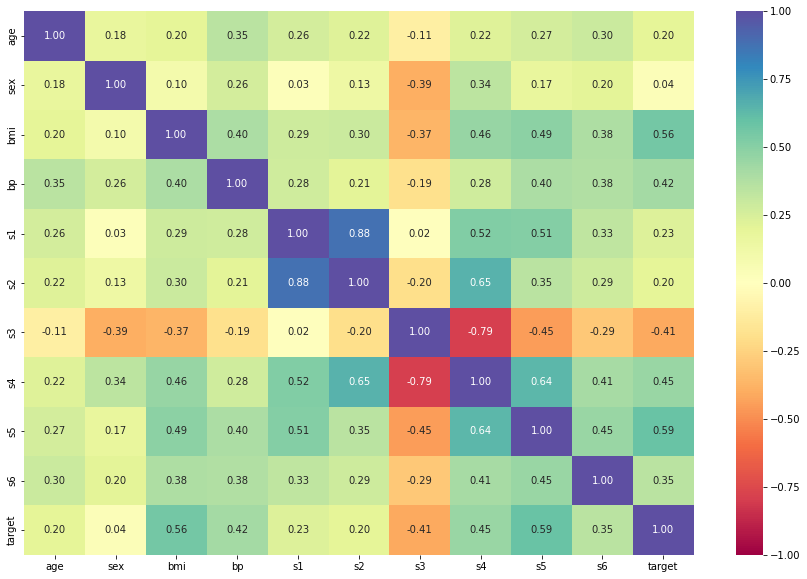

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(data = data.corr(method = "spearman"), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral");

* s1 and s2 have are highly correlated.
* Target has significant possitive correlation with bmi, s5, , bp, and s4, and a significant negative correlation with s3.
* s3 (low-density lipoproteins) seems to be a good factor to fight against diabetes.

### Pair Plot

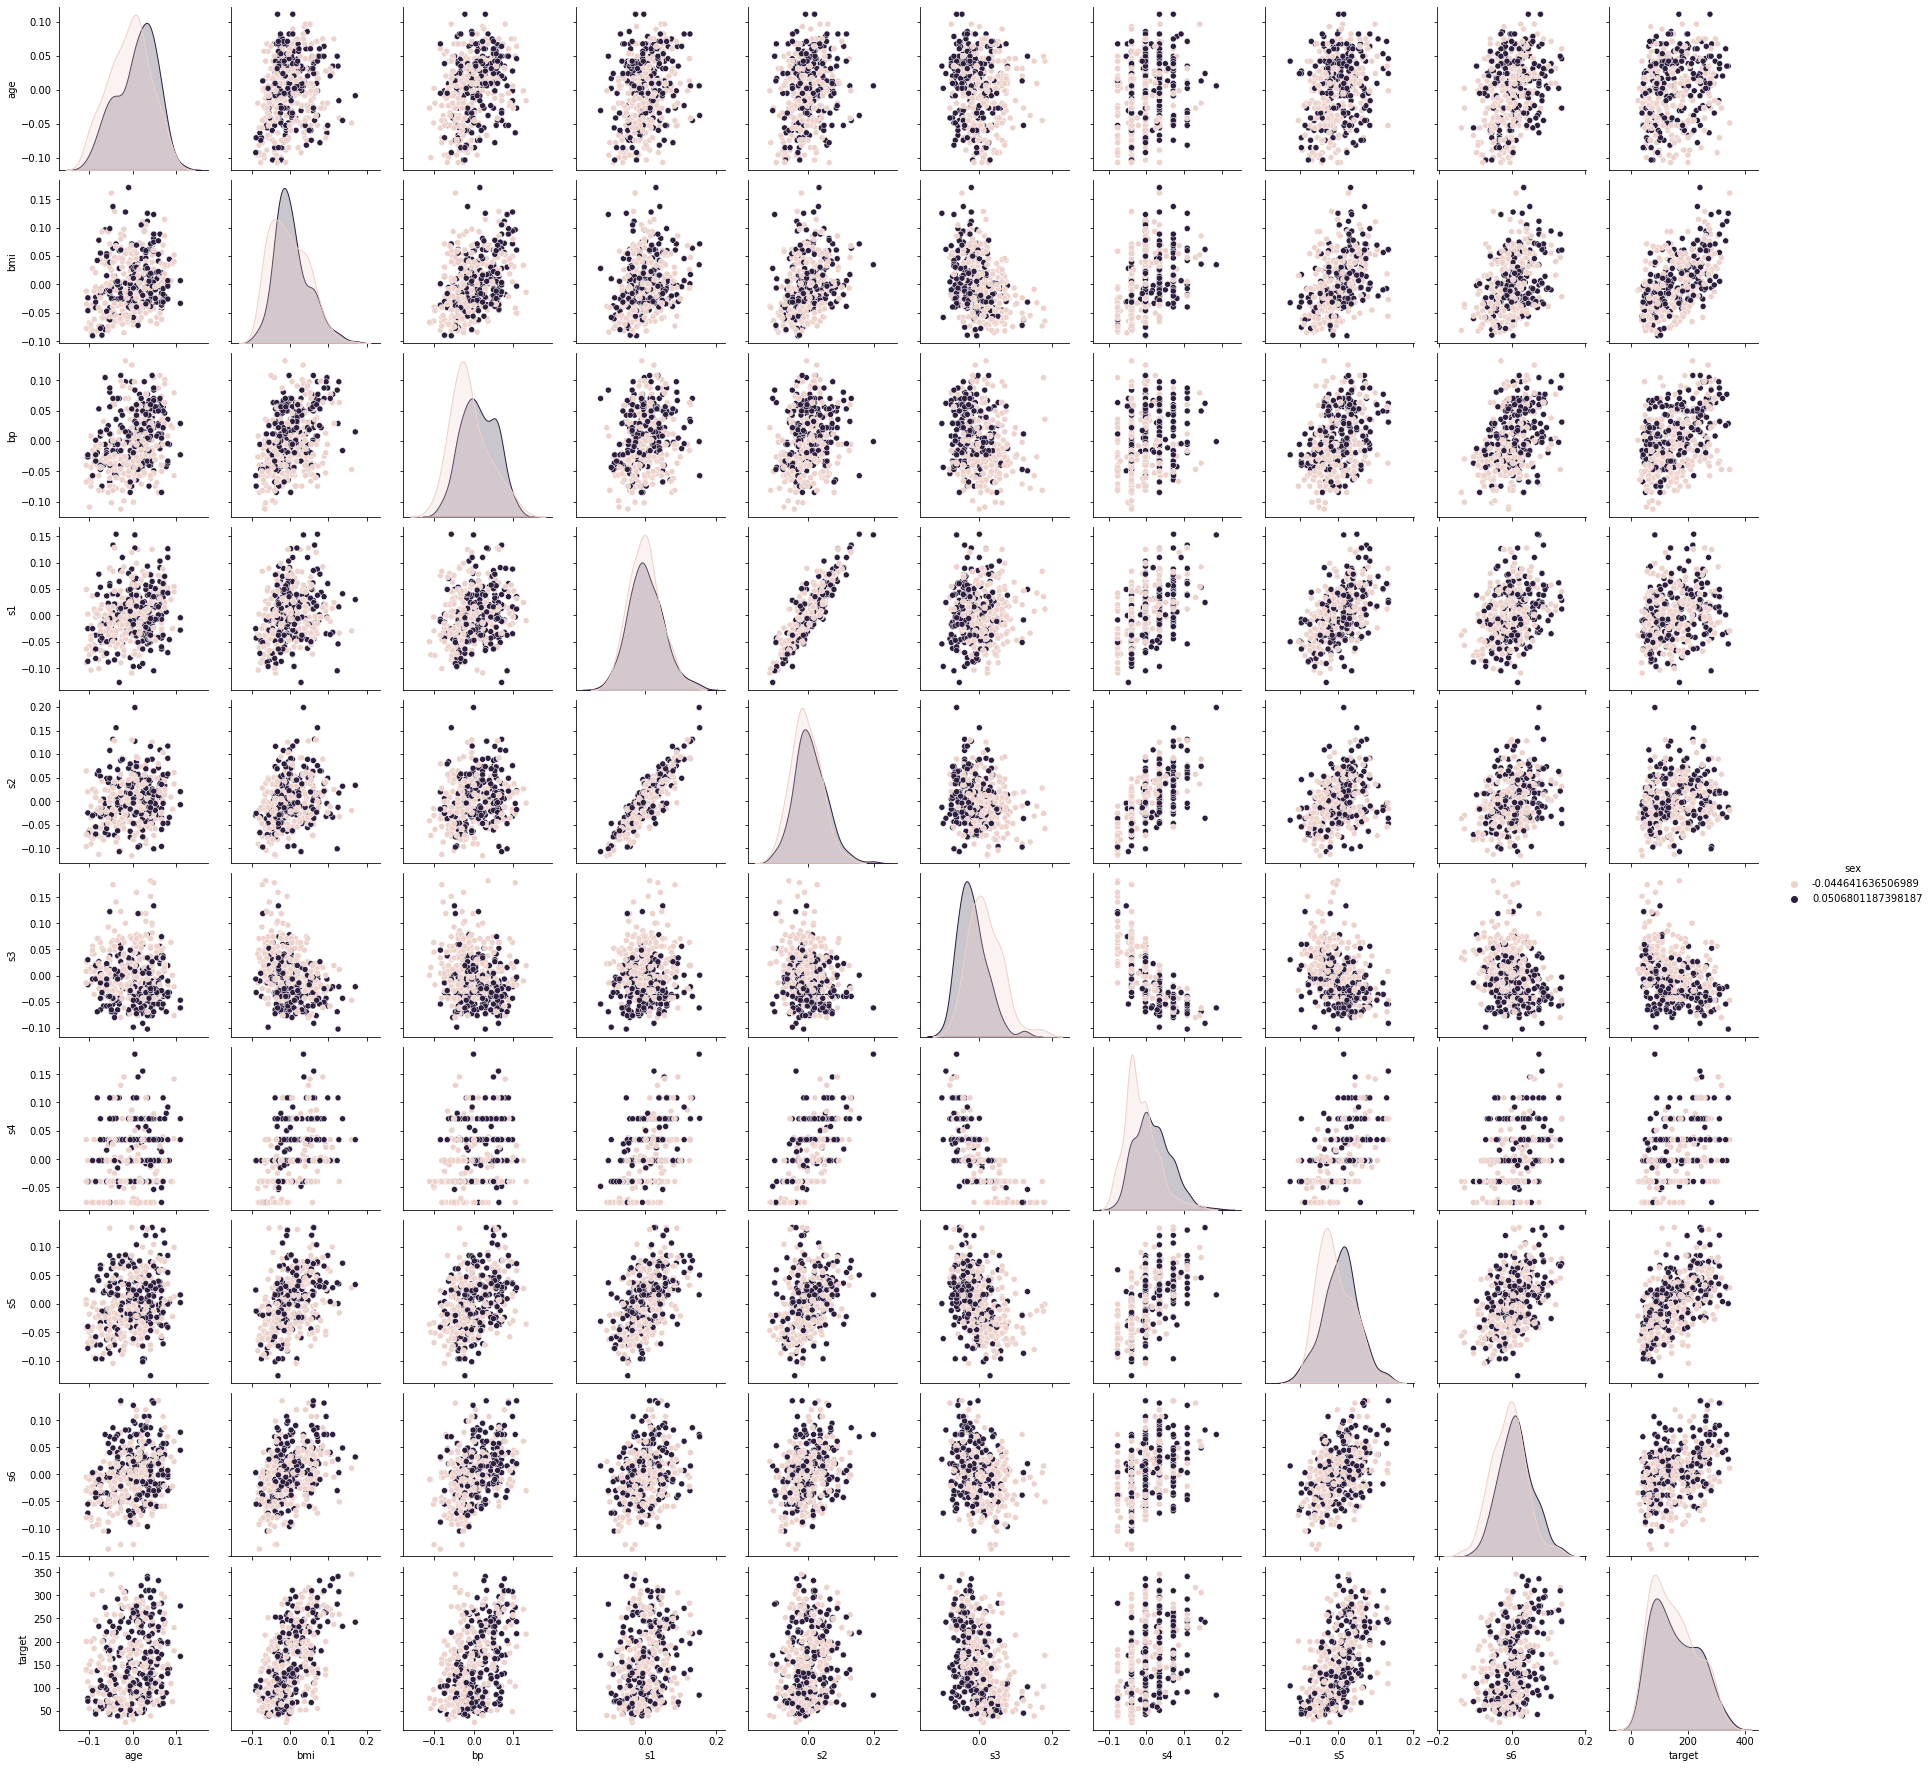

In [17]:
sns.pairplot(data = data, hue = "sex")

Similar interpretation as the correlation plot.

In [ ]:
data = pd.get_dummies(data, drop_first = True)
data

# Regression

Meta-data:

In [18]:
features = list(data.drop("target", axis = 1))
target = "target"
print(features)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Splitting the data into train and test

In [19]:
train, test = train_test_split(data, test_size = 0.2, random_state = 10)

print(train.shape[0], test.shape[0], data.shape[0])

353 89 442


In [20]:
train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
252,0.01,-0.04,0.06,-0.06,0.02,0.05,-0.04,0.05,-0.00,-0.03,91.00
416,-0.03,-0.04,0.08,0.10,-0.00,0.02,-0.02,0.00,-0.03,0.04,257.00
418,0.01,-0.04,-0.02,-0.03,0.10,0.09,0.07,-0.00,-0.02,0.01,84.00
163,0.02,0.05,0.07,0.08,-0.01,0.01,-0.01,-0.00,-0.02,0.06,131.00
253,0.08,-0.04,0.03,0.01,0.05,0.06,-0.02,0.03,0.03,0.07,150.00


In [21]:
test.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
119,0.02,-0.04,-0.05,-0.00,-0.02,-0.04,0.03,-0.04,0.03,0.03,200.00
207,0.01,-0.04,0.05,0.03,0.01,-0.01,0.03,-0.04,0.05,0.04,202.00
236,0.03,-0.04,0.01,0.04,0.08,0.07,0.02,0.03,0.04,0.01,67.00
288,0.07,0.05,-0.02,0.02,0.04,0.06,0.04,-0.00,-0.07,-0.02,80.00
174,0.02,0.05,0.01,-0.04,-0.10,-0.09,-0.04,-0.04,0.02,0.01,151.00


## Linear Regression

In [22]:
# Creating the model
model_lr = LinearRegression()

# Training the model on the train data
model_lr.fit(train[features], train[target])

LinearRegression()

Let's check how the model behaves on the train data:

In [23]:
# Calculating predictions
pred = model_lr.predict(train[features])

# Metrics
print("R2 Score:", r2_score(train[target], pred))
print("MSE:", mean_squared_error(train[target], pred))
print("Expl. Var.:", explained_variance_score(train[target], pred))

R2 Score: 0.5122968220801789
MSE: 2851.0252092365868
Expl. Var.: 0.5122968220801789


### Metrics DataFrame

In [24]:
def regression_metrics(model, data, features = features, target = target):

    # Computing prediction
    pred = model.predict(data[features])

    # Computing metrics
    r2 = r2_score(data[target], pred)
    mse = mean_squared_error(data[target], pred)
    evs = explained_variance_score(data[target], pred)

    # DataFrame
    df = pd.DataFrame([r2, mse, evs], index = ["R2 Score", "MSE", "Exp. Var."], columns = ["Values"])
    
    return df
    

In [25]:
print("Train Data")
regression_metrics(model_lr, train)

Train Data


,Values
R2 Score,0.51
MSE,2851.03
Exp. Var.,0.51


In [26]:
print("Test Data")
regression_metrics(model_lr, test)

Test Data


,Values
R2 Score,0.53
MSE,2911.83
Exp. Var.,0.53


Predictions look okay, but they could be better.

Text(0.5, 1.0, 'Linear Regression')

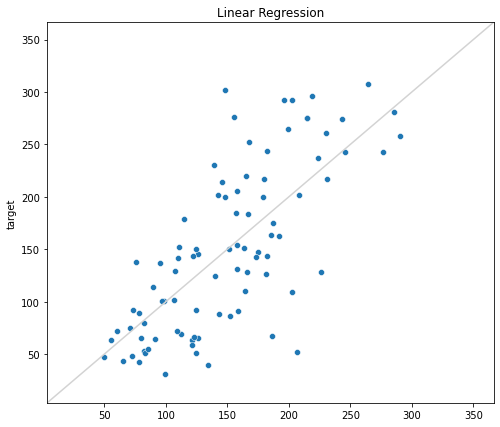

In [31]:
plt.figure(figsize = (8,7))
plt.axline((20,20), (350, 350), color = "lightgray")
sns.scatterplot(model_lr.predict(test[features]), test[target])
plt.title("Linear Regression")

## Support Vector Regressor

First, let's try the linear SVR.

In [54]:
model_linearsvr = LinearSVR(loss = 'squared_epsilon_insensitive', random_state = 10, dual = False, C = 10)

model_linearsvr.fit(train[features], train[target])

LinearSVR(C=10, dual=False, loss='squared_epsilon_insensitive', random_state=10)

Checking the metrics:

In [55]:
print("Train Data")
print(regression_metrics(model_linearsvr, train))
print(20 * "-")

print("Test Data")
print(regression_metrics(model_linearsvr, test))
print(20 * "-")

Train Data
           Values
R2 Score     0.51
MSE       2871.02
Exp. Var.    0.51
--------------------
Test Data
           Values
R2 Score     0.53
MSE       2961.96
Exp. Var.    0.53
--------------------


Text(0.5, 1.0, 'Linear SVR')

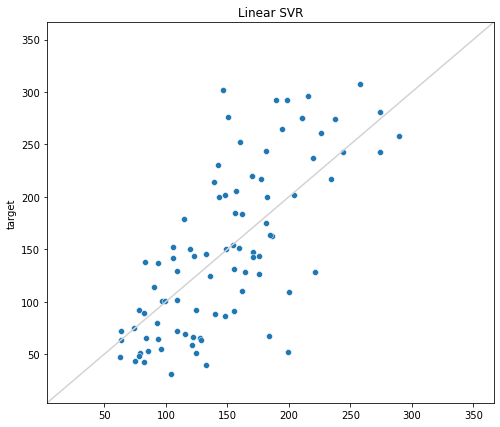

In [56]:
plt.figure(figsize = (8,7))
plt.axline((20,20), (350, 350), color = "lightgray")
sns.scatterplot(model_linearsvr.predict(test[features]), test[target])
plt.title("Linear SVR")

Similar results as the linear regression.

## Neural Networks

Now let's try a non-linear model to predict the price of the houses:

In [76]:
len(features)

10

In [124]:
model_nn = MLPRegressor(
    hidden_layer_sizes = (10, 30, 10),
    activation = "relu",
    solver = "lbfgs",
    max_iter = 500,
    early_stopping = True,
    n_iter_no_change = 10,
    random_state = 10
).fit(train[features], train[target])

print("Train Data")
print(regression_metrics(model_nn, train))
print(20 * "-")

print("Test Data")
print(regression_metrics(model_nn, test))
print(20 * "-")

Train Data
           Values
R2 Score     0.56
MSE       2582.52
Exp. Var.    0.56
--------------------
Test Data
           Values
R2 Score     0.52
MSE       3018.65
Exp. Var.    0.52
--------------------


Text(0.5, 1.0, 'Neural Networks')

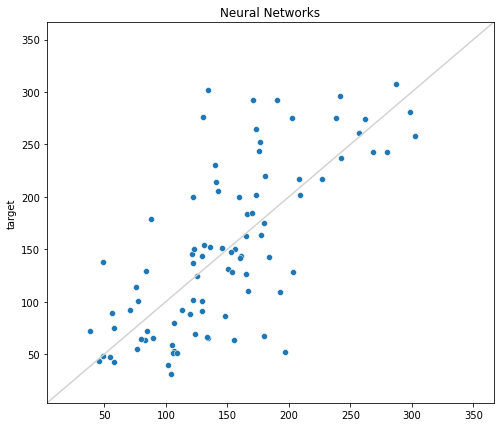

In [125]:
plt.figure(figsize = (8,7))
plt.axline((20,20), (350, 350), color = "lightgray")
sns.scatterplot(model_nn.predict(test[features]), test[target])
plt.title("Neural Networks")

The neural networks model has a better performance in the training data, but is slightly worse in the test data. This behaviour is an indication of overfitting, which we will discuss better next week during lecture 10.

# Summary

## EDA

* The data is already scaled with no missing values.
* There is difference in the features for each gender, but not for the target.
* s3 (low-density lipoproteins) seems to be a good factor to fight against diabetes.


## Regression

* Linear regression and Linear SVR showed the same performance.
* The neural networks was the one with the best performance for the training data, but was slightly worst in the test data.
* The neural networks model is, apparently, overfitting the data.